<a href="https://colab.research.google.com/github/iamvssrao/FastAI/blob/main/Golden_ratio_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/ && chmod 660 ~/.kaggle/kaggle.json

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/ && chmod 660 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/celeba-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.33G/1.33G [00:34<00:00, 41.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2


In [ ]:
!ls /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2

img_align_celeba      list_bbox_celeba.csv     list_landmarks_align_celeba.csv
list_attr_celeba.csv  list_eval_partition.csv


In [106]:
!cp -r /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/* /content

In [ ]:
!cd img_align_celeba/img_align_celeba && ls

In [107]:
ls

2/                 list_attr_celeba.csv  list_eval_partition.csv
img_align_celeba/  list_bbox_celeba.csv  list_landmarks_align_celeba.csv


In [108]:
import pandas as pd
ldf = pd.read_csv('/content/list_landmarks_align_celeba.csv')
ldf.iloc[0:17]

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150
5,000006.jpg,71,111,106,110,94,131,74,154,102,153
6,000007.jpg,70,112,108,111,85,135,72,152,104,152
7,000008.jpg,71,110,106,111,84,137,73,155,104,153
8,000009.jpg,68,113,110,111,97,139,66,152,109,150
9,000010.jpg,68,111,108,112,89,136,70,151,107,151


In [109]:
import numpy as np
import pandas as pd

# Assume `ldf` is a Pandas DataFrame with facial landmark columns
def is_frontal_face_fast(ldf, angle_threshold=10):
    lx, ly = ldf["lefteye_x"].values, ldf["lefteye_y"].values
    rx, ry = ldf["righteye_x"].values, ldf["righteye_y"].values
    nx, ny = ldf["nose_x"].values, ldf["nose_y"].values

    # Compute dx and dy arrays for all rows at once
    dx = rx - lx
    dy = ry - ly

    # Compute roll and yaw angles using NumPy vectorized operations
    roll = np.degrees(np.arctan2(dy, dx))  # Vectorized roll calculation
    mid_eye_x = (lx + rx) / 2
    yaw = np.degrees(np.arctan2(nx - mid_eye_x, dx))  # Vectorized yaw calculation

    # Boolean mask for frontal faces
    frontal_mask = (np.abs(yaw) < angle_threshold) & (np.abs(roll) < angle_threshold)

    # Assign the result as a new column
    ldf["is_frontal"] = frontal_mask

    return ldf

# Apply the optimized function
ldf = is_frontal_face_fast(ldf)

# Display results
ldf.iloc[0:20]


,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,is_frontal
0,000001.jpg,69,109,106,113,77,142,73,152,108,154,False
1,000002.jpg,69,110,107,112,81,135,70,151,108,153,False
2,000003.jpg,76,112,104,106,108,128,74,156,98,158,False
3,000004.jpg,72,113,108,108,101,138,71,155,101,151,False
4,000005.jpg,66,114,112,112,86,119,71,147,104,150,True
5,000006.jpg,71,111,106,110,94,131,74,154,102,153,True
6,000007.jpg,70,112,108,111,85,135,72,152,104,152,True
7,000008.jpg,71,110,106,111,84,137,73,155,104,153,True
8,000009.jpg,68,113,110,111,97,139,66,152,109,150,False
9,000010.jpg,68,111,108,112,89,136,70,151,107,151,True


In [110]:
frontal_df = ldf[ldf["is_frontal"] == True]
frontal_df.head()

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,is_frontal
4,000005.jpg,66,114,112,112,86,119,71,147,104,150,True
5,000006.jpg,71,111,106,110,94,131,74,154,102,153,True
6,000007.jpg,70,112,108,111,85,135,72,152,104,152,True
7,000008.jpg,71,110,106,111,84,137,73,155,104,153,True
9,000010.jpg,68,111,108,112,89,136,70,151,107,151,True


In [111]:
import os
from pprint import pprint
from pathlib import Path
path = Path(os.path.abspath("./img_align_celeba/img_align_celeba"))
images = [p for p in path.iterdir()]
images.sort()
pprint(images[:5])


[Path('/content/img_align_celeba/img_align_celeba/000001.jpg'),
 Path('/content/img_align_celeba/img_align_celeba/000002.jpg'),
 Path('/content/img_align_celeba/img_align_celeba/000003.jpg'),
 Path('/content/img_align_celeba/img_align_celeba/000004.jpg'),
 Path('/content/img_align_celeba/img_align_celeba/000005.jpg')]


In [112]:
import numpy as np
import pandas as pd

def compute_golden_ratios(df):
    # Extract coordinates as NumPy arrays
    lefteye_x = df["lefteye_x"].values
    lefteye_y = df["lefteye_y"].values
    righteye_x = df["righteye_x"].values
    righteye_y = df["righteye_y"].values
    nose_x = df["nose_x"].values
    nose_y = df["nose_y"].values
    leftmouth_x = df["leftmouth_x"].values
    leftmouth_y = df["leftmouth_y"].values
    rightmouth_x = df["rightmouth_x"].values
    rightmouth_y = df["rightmouth_y"].values

    # Calculate eye width (optional use)
    # eye_width = np.sqrt((righteye_x - lefteye_x)**2 + (righteye_y - lefteye_y)**2)

    # Midpoint between eyes and mouth
    eye_center_x = (lefteye_x + righteye_x) / 2
    eye_center_y = (lefteye_y + righteye_y) / 2
    mouth_center_x = (leftmouth_x + rightmouth_x) / 2
    mouth_center_y = (leftmouth_y + rightmouth_y) / 2

    # Upper and lower face heights
    upper_face = np.sqrt((eye_center_x - nose_x)**2 + (eye_center_y - nose_y)**2)
    lower_face = np.sqrt((mouth_center_x - nose_x)**2 + (mouth_center_y - nose_y)**2)

    # Avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        golden_ratio = np.where(lower_face != 0, upper_face / lower_face, np.nan)

    # Add to DataFrame
    df["golden_ratio"] = golden_ratio
    df["is_beautiful"] = (golden_ratio > 1.5) & (golden_ratio < 1.62)

    return df

gdf = compute_golden_ratios(frontal_df.copy())
gdf.head()

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,is_frontal,golden_ratio,is_beautiful
4,000005.jpg,66,114,112,112,86,119,71,147,104,150,True,0.227103,False
5,000006.jpg,71,111,106,110,94,131,74,154,102,153,True,0.911481,False
6,000007.jpg,70,112,108,111,85,135,72,152,104,152,True,1.380898,False
7,000008.jpg,71,110,106,111,84,137,73,155,104,153,True,1.528495,True
9,000010.jpg,68,111,108,112,89,136,70,151,107,151,True,1.633786,False


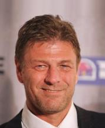

In [129]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *
im = Image.open('/content/img_align_celeba/img_align_celeba/000659.jpg')
im.to_thumb(128,128)

In [131]:
gdf[gdf["is_beautiful"] == True].iloc[:10]

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,is_frontal,golden_ratio,is_beautiful
7,000008.jpg,71,110,106,111,84,137,73,155,104,153,True,1.528495,True
11,000012.jpg,69,112,108,112,89,136,68,150,109,152,True,1.599459,True
17,000018.jpg,67,112,110,112,88,135,68,150,109,150,True,1.532844,True
32,000033.jpg,69,111,108,111,88,136,72,152,105,152,True,1.562050,True
43,000044.jpg,71,110,106,111,87,137,73,153,105,154,True,1.596943,True
52,000053.jpg,70,112,108,111,91,137,72,153,103,152,True,1.609686,True
64,000065.jpg,69,112,108,111,87,136,71,152,106,151,True,1.576241,True
67,000068.jpg,69,111,108,111,93,136,72,151,105,153,True,1.528315,True
80,000081.jpg,69,112,108,111,95,136,68,153,109,150,True,1.508090,True
100,000101.jpg,69,112,108,111,92,136,71,152,105,151,True,1.546041,True


In [92]:
len(gdf[gdf["is_beautiful"] == True])

11837

In [93]:
len(gdf)

146753

In [94]:
from pathlib import Path
path=Path("img_align_celeba/img_align_celeba")
img_files=get_image_files(path)
max_x=0
max_y=0
for img in img_files:
  image=Image.open(img)
  size_x,size_y=image.size
  if size_x>max_x:
    max_x=size_x
  if size_y>max_y:
    max_y=size_y


In [95]:
print(max_x, max_y)

178 218


In [143]:
!cd img_align_celeba/img_align_celeba/ && ls | grep '000008.jpg'

In [139]:
!mkdir dataset && cd dataset && mkdir Not_Beautiful && mkdir Beautiful

In [ ]:
import shutil
import os

beautiful_image_name_list = gdf[gdf["is_beautiful"] == True]["image_id"].tolist()
not_beautiful_image_name_list = gdf[gdf["is_beautiful"] == False]["image_id"].tolist()

dest_folder = os.path.join("dataset", "Beautiful")

for i in range(500):
    source_path = os.path.join("img_align_celeba", "img_align_celeba", beautiful_image_name_list[i])
    dest_path = os.path.join(dest_folder, beautiful_image_name_list[i])
    try:
        shutil.move(source_path, dest_path)
    except FileNotFoundError:
        print(f"File not found: {source_path}")

dest_folder = os.path.join("dataset", "Not_Beautiful")
for i in range(500):
    source_path = os.path.join("img_align_celeba", "img_align_celeba", not_beautiful_image_name_list[i])
    dest_path = os.path.join(dest_folder,  not_beautiful_image_name_list[i])
    try:
        shutil.move(source_path, dest_path)
    except FileNotFoundError:
        print(f"File not found: {source_path}")

In [144]:
!ls -p dataset/Not_Beautiful | grep -v / | wc -l

500


In [145]:
!ls -p dataset/Beautiful | grep -v / | wc -l

500


In [149]:
path = Path('dataset')
celebrities= DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label)
dls = celebrities.dataloaders(path)

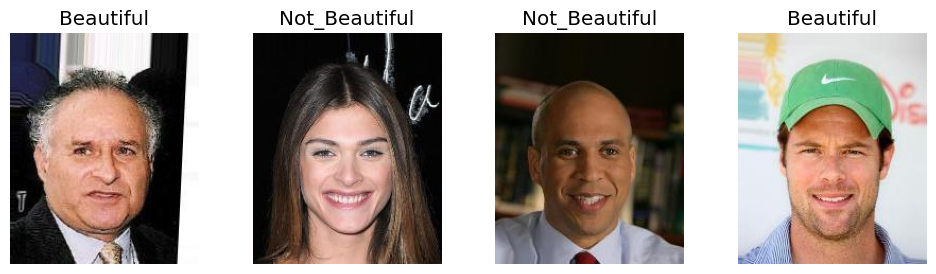

In [150]:
dls.train.show_batch(max_n=4, nrows=1)

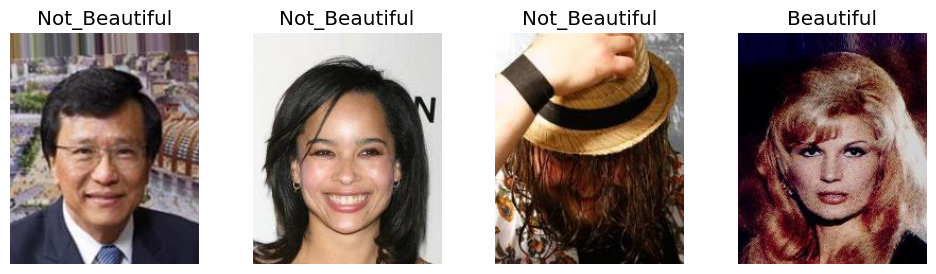

In [151]:
dls.valid.show_batch(max_n=4, nrows=1)

In [152]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.236089,0.992154,0.450000,02:27


epoch,train_loss,valid_loss,error_rate,time
0,0.957292,0.913811,0.475000,03:28
1,0.772954,1.007200,0.450000,03:21
2,0.559670,1.240984,0.495000,03:20
3,0.436503,1.242604,0.510000,03:29


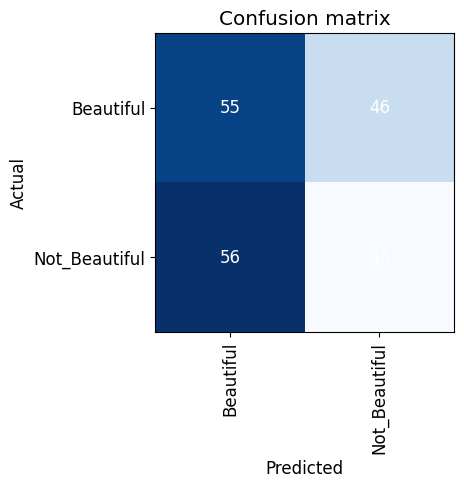

In [153]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()